In [ ]:
import reload_data

In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.applications import EfficientNetB1

In [3]:
source_dir = "/content/Data"

In [11]:
train_ds,val_ds = reload_data.full_unzip_and_stratify("/content/CSAFE_Handwriting_Images.zip",source_dir)

Found 1980 files belonging to 90 classes.
Found 450 files belonging to 90 classes.


In [12]:
IMAGE_SIZE = (384,384)
BATCH_SIZE = 18
INPUT_SHAPE = IMAGE_SIZE + (3,)

### EfficientNetB1

In [13]:
base_model = EfficientNetB1(include_top = False,
                        classifier_activation="softmax",
                        weights = "imagenet",
                        input_shape=(IMAGE_SIZE + (3,))
                        )

27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
from tensorflow import data as tf_data
from keras import layers

In [14]:
def make_transfer_model(input_shape, num_classes):
    backbone = base_model

    backbone.trainable = False

    inputs = layers.Input(input_shape)
    x = keras.applications.resnet.preprocess_input(inputs)
    x = backbone(x)
    x = layers.Dropout(0.3)(x)

    x = layers.GlobalAveragePooling2D()(x)

    units = num_classes

    x = layers.Dropout(0.25)(x)
    outputs = layers.Dense(units, activation=None)(x)

    return keras.Model(inputs, outputs, name="baseline")


model = make_transfer_model(input_shape=INPUT_SHAPE, num_classes=90)

In [16]:
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

In [18]:
epochs = 10

callbacks = [keras.callbacks.ModelCheckpoint("save_at_epoch{epoch}.keras"),]

model.compile(
    optimizer= "adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )

history = model.fit(
    train_ds,
    epochs= epochs,
    callbacks= callbacks,
    validation_data= val_ds,)

model.save("/content/EfficientNet.keras")

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 791s 7s/step - acc: 0.1132 - loss: 3.9189 - val_acc: 0.2000 - val_loss: 3.6844
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 756s 7s/step - acc: 0.1490 - loss: 3.6928 - val_acc: 0.2311 - val_loss: 3.5391
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 785s 7s/step - acc: 0.1834 - loss: 3.5375 - val_acc: 0.2400 - val_loss: 3.4150
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 780s 7s/step - acc: 0.2344 - loss: 3.3922 - val_acc: 0.2844 - val_loss: 3.3075
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 801s 7s/step - acc: 0.2458 - loss: 3.3113 - val_acc: 0.2911 - val_loss: 3.2088
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 803s 7s/step - acc: 0.2653 - loss: 3.2263 - val_acc: 0.3711 - val_loss: 3.1203
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 741s 7s/step - acc: 0.2848 - loss: 3.1134 - val_acc: 0.3756 - val_loss: 3.0424
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 707s 6s/step - acc: 0.3111 - loss: 3.0904 - val_acc: 0.3822 - val_loss: 2.9732
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 782s 7s/

    Accuracy is already significantly higher than ResNet/Base Model, loss values are lower

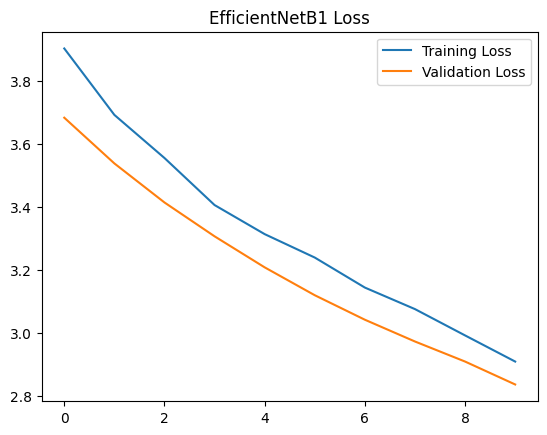

In [21]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.title("EfficientNetB1 Loss")
plt.legend()
plt.show()

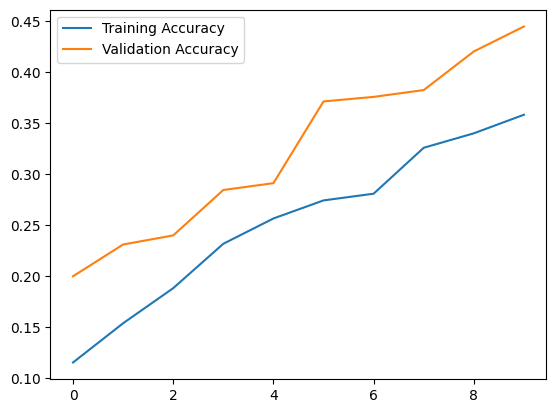

In [20]:
plt.plot(range(len(history.history["acc"])),history.history["acc"],label="Training Accuracy")
plt.plot(range(len(history.history["val_acc"])),history.history["val_acc"],label="Validation Accuracy")
plt.title("EfficientNetB1 Accuracy")
plt.legend()
plt.show()

    I will not be applying augmentations, since they didn't seem to be beneficial in previous attempts with
    ResNet/BaseModel

### MobileNetV2

In [22]:
from keras.applications import MobileNetV2

In [23]:
base_model = MobileNetV2(include_top = False,
                        classifier_activation="softmax",
                        weights = "imagenet",
                        input_shape=(IMAGE_SIZE + (3,))
                        )

model = make_transfer_model(input_shape=INPUT_SHAPE, num_classes=90)

/tmp/ipython-input-23-1742157566.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top = False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
epochs = 10

In [26]:
model.compile(
    optimizer= "adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )

history = model.fit(
    train_ds,
    epochs= epochs,
    callbacks= callbacks,
    validation_data= val_ds,)

model.save("/content/MobileNet.keras")

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - acc: 0.0208 - loss: 5.0405 - val_acc: 0.0556 - val_loss: 4.1929
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 361s 3s/step - acc: 0.0530 - loss: 4.2416 - val_acc: 0.1311 - val_loss: 3.7971
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 400s 3s/step - acc: 0.1134 - loss: 3.8507 - val_acc: 0.1956 - val_loss: 3.5127
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 377s 3s/step - acc: 0.1616 - loss: 3.5349 - val_acc: 0.2533 - val_loss: 3.2810
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 359s 3s/step - acc: 0.2339 - loss: 3.2207 - val_acc: 0.2822 - val_loss: 3.1189
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 385s 3s/step - acc: 0.2863 - loss: 3.0362 - val_acc: 0.3578 - val_loss: 2.9357
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - acc: 0.3221 - loss: 2.8714 - val_acc: 0.3467 - val_loss: 2.8018
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 363s 3s/step - acc: 0.3463 - loss: 2.6944 - val_acc: 0.3689 - val_loss: 2.7018
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 400s 3s/

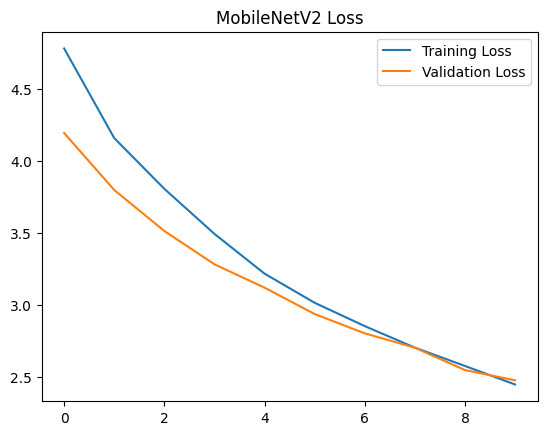

In [27]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.title("MobileNetV2 Loss")
plt.legend()
plt.show()

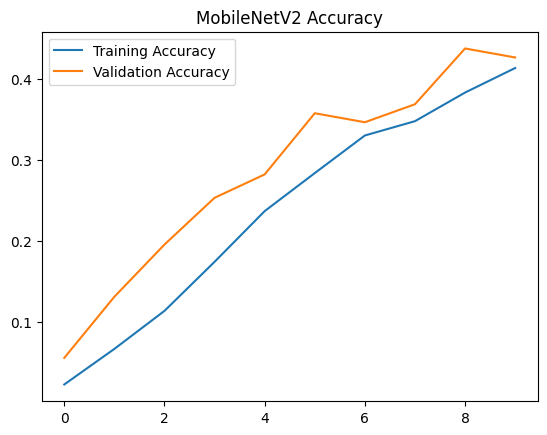

In [28]:
plt.plot(range(len(history.history["acc"])),history.history["acc"],label="Training Accuracy")
plt.plot(range(len(history.history["val_acc"])),history.history["val_acc"],label="Validation Accuracy")
plt.title("MobileNetV2 Accuracy")
plt.legend()
plt.show()